<h1>HANDS ON PROJECT - CHICAGO 2001 ACCIDENT DATA ANALYTIC PROJECT</h1>
<hr>
<h3>Analyst: Jeremy Bryan T. Villanueva</h3>

<h2>Libraries</h2>

In [112]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

<h2>Converting Datasets into DataFrame</h2>

In [56]:
present = pd.read_csv('dataset\\Chicago_crimes.csv')
present

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


<h2>DataFrame Info</h2>

In [57]:
present.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    249123 non-null  int64  
 1   Case Number           249123 non-null  object 
 2   Date                  249123 non-null  object 
 3   Block                 249123 non-null  object 
 4   IUCR                  249123 non-null  object 
 5   Primary Type          249123 non-null  object 
 6   Description           249123 non-null  object 
 7   Location Description  248266 non-null  object 
 8   Arrest                249123 non-null  bool   
 9   Domestic              249123 non-null  bool   
 10  Beat                  249123 non-null  int64  
 11  District              249123 non-null  int64  
 12  Ward                  249123 non-null  int64  
 13  Community Area        249120 non-null  float64
 14  FBI Code              249123 non-null  object 
 15  

<h2>DataFrame Basic Descriptive Statistics</h2>

In [58]:
present.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.491230e+05,249123.000000,249123.000000,249123.000000,249120.000000,2.490330e+05,2.490330e+05,249123.000000,249033.000000,249033.000000
mean,1.358652e+07,1153.845634,11.308924,23.186823,36.238560,1.165309e+06,1.887602e+06,2024.241668,41.847162,-87.668845
std,6.473192e+05,707.959752,7.074807,13.925951,21.567485,1.616814e+04,3.146277e+04,0.428095,0.086517,0.058875
min,2.807300e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567
25%,1.352322e+07,533.000000,5.000000,10.000000,22.000000,1.153981e+06,1.860560e+06,2024.000000,41.772706,-87.710071
50%,1.361560e+07,1034.000000,10.000000,23.000000,32.000000,1.167190e+06,1.894278e+06,2024.000000,41.865616,-87.661690
75%,1.370865e+07,1732.000000,17.000000,34.000000,53.000000,1.176662e+06,1.910282e+06,2024.000000,41.909711,-87.627233
max,1.381045e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531


<h2>Checking Null Values</h2>

In [59]:
present.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

<h2>Fill Null Values with Statistical Values</h2>

In [60]:
present['Location Description'] = present['Location Description'].fillna(present['Location Description'].mode()[0])
present['Community Area'] = present['Community Area'].fillna(present['Community Area'].mode()[0])
present['Location'] = present['Location'].fillna(present['Location'].mode()[0])
present['Ward'] = present['Ward'].fillna(present['Ward'].mean())
present['District'] = present['District'].fillna(present['District'].mean())
present['X Coordinate'] = present['X Coordinate'].fillna(present['X Coordinate'].mean())
present['Y Coordinate'] = present['Y Coordinate'].fillna(present['Y Coordinate'].mean())
present['Latitude'] = present['Latitude'].fillna(present['Latitude'].mean())
present['Longitude'] = present['Longitude'].fillna(present['Longitude'].mean())

<h2>Checking Column Data Types</h2>

In [61]:
present.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [62]:
# Convert to string (object)
present['Case Number'] = present['Case Number'].astype('category')
present['Date'] = present['Date'].astype('category')
present['Block'] = present['Block'].astype('category')
present['IUCR'] = present['IUCR'].astype('category')
present['Primary Type'] = present['Primary Type'].astype('category')
present['Description'] = present['Description'].astype('category')
present['Location Description'] = present['Location Description'].astype('category')
present['FBI Code'] = present['FBI Code'].astype('category')
present['Updated On'] = present['Updated On'].astype('category')
present['Location'] = present['Location'].astype('category')

<h1>Exploratory Data Analytics</h1>

<h2>Question 1</h2>
<h3>Which primary crime types are most common?</h3>

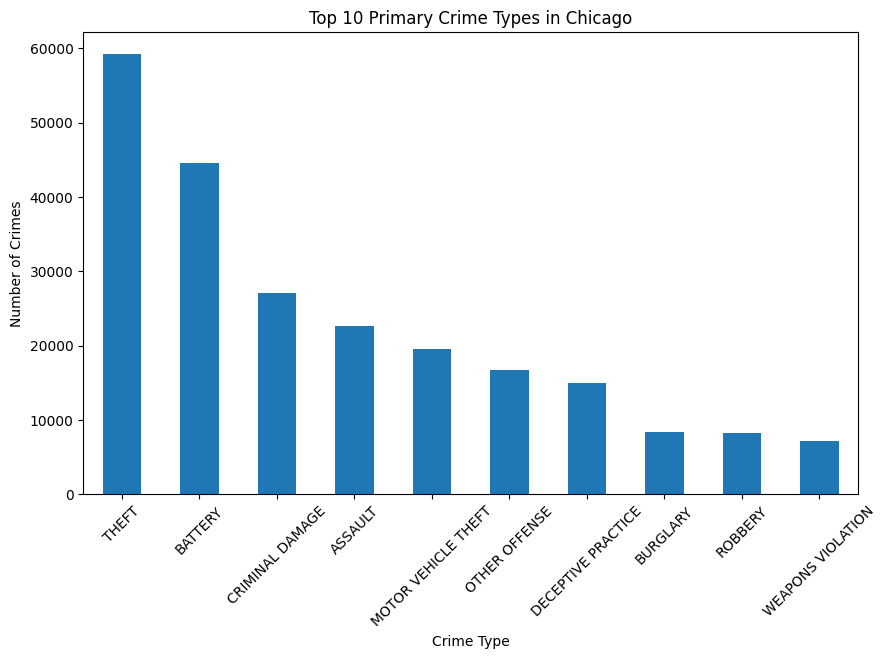

In [63]:
q1_type = present['Primary Type'].value_counts().head(10)

q1_type.plot(kind='bar', figsize=(10,6))
plt.title("Top 10 Primary Crime Types in Chicago")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()

<h2>Insight 1</h2>
<h3>Theft and battery dominate as the most frequent crimes, reflecting Chicago’s everyday public safety challenges.</h3>

<h2>Question 2</h2>
<h3>Which wards recorded the highest number of crimes?</h3>

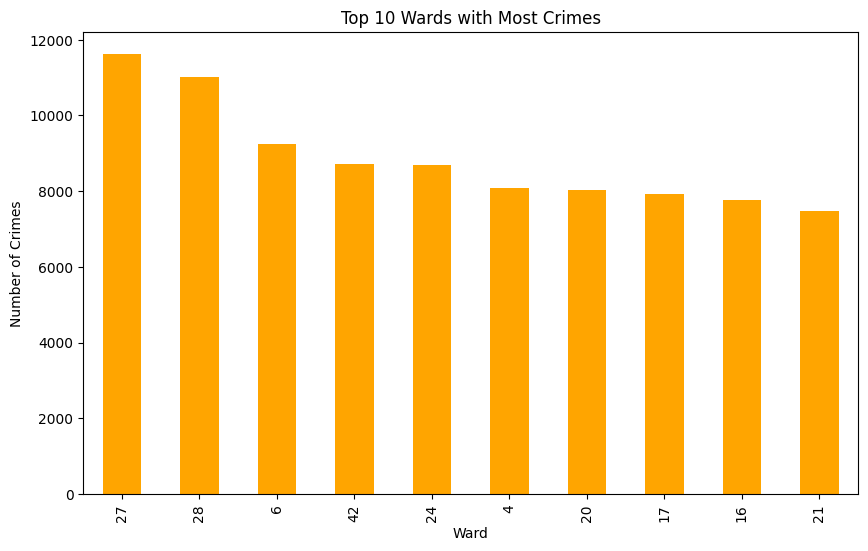

In [64]:
q2_ward = present['Ward'].value_counts().head(10)

q2_ward.plot(kind='bar', figsize=(10,6), color='orange')
plt.title("Top 10 Wards with Most Crimes")
plt.xlabel("Ward")
plt.ylabel("Number of Crimes")
plt.show()


<h2>Insight 2</h2>
<h3>Certain wards show consistently higher crime rates, making them priority areas for community policing.</h3>

<h2>Question 3</h2>
<h3>How do crimes vary across months of the year?</h3>

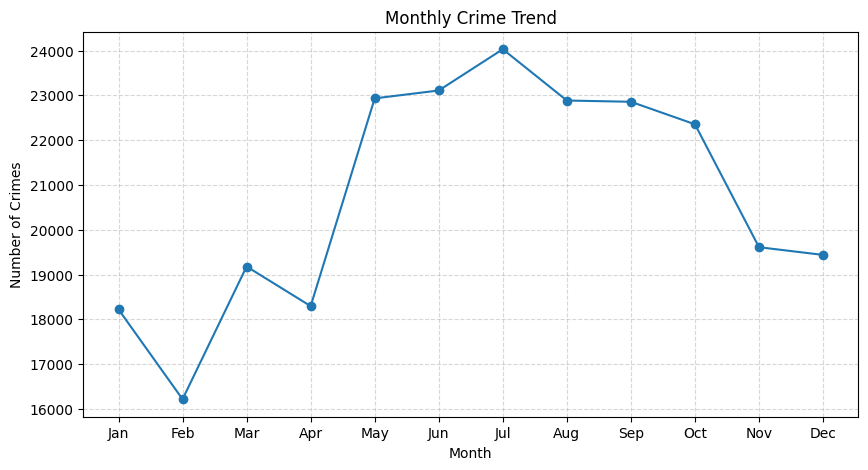

In [74]:
present['Date'] = pd.to_datetime(present['Date'], errors='coerce')

present['Month'] = present['Date'].dt.month

q3_month = present['Month'].value_counts().sort_index()

q3_month.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Monthly Crime Trend")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(range(1,13), 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


<h2>Insight 3</h2>
<h3>Crimes peak during warmer months, showing a seasonal pattern linked to outdoor activity.</h3>

<h2>Question 4</h2>
<h3>What is the distribution of arrests versus non-arrests?</h3>

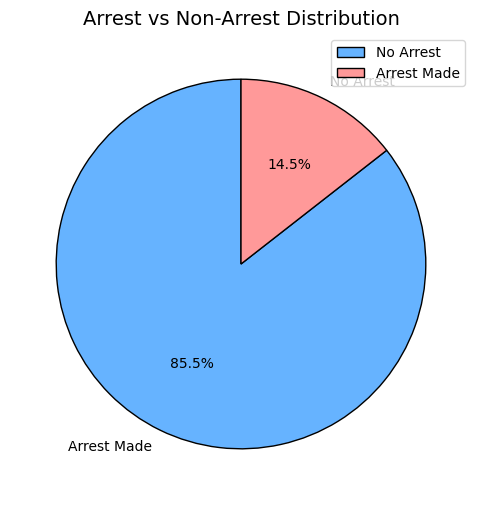

In [68]:
q4_arrest = present['Arrest'].value_counts()
plt.figure(figsize=(6,6))
q4_arrest.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#66b3ff','#ff9999'],
    labels=['Arrest Made', 'No Arrest'], 
    wedgeprops={'edgecolor':'black'}
)
plt.title("Arrest vs Non-Arrest Distribution", fontsize=14)
plt.ylabel("")  
plt.legend(q4_arrest.index.map({True:"Arrest Made", False:"No Arrest"}), loc="upper right")
plt.show()


<h2>Insight 4</h2>
<h3>The majority of crimes end without an immediate arrest, showing that many cases require further investigation. This reflects the complexity of crime-solving and the need for stronger strategies in law enforcement.</h3>

<h2>Question 5</h2>
<h3>Which locations report the most crimes?</h3>

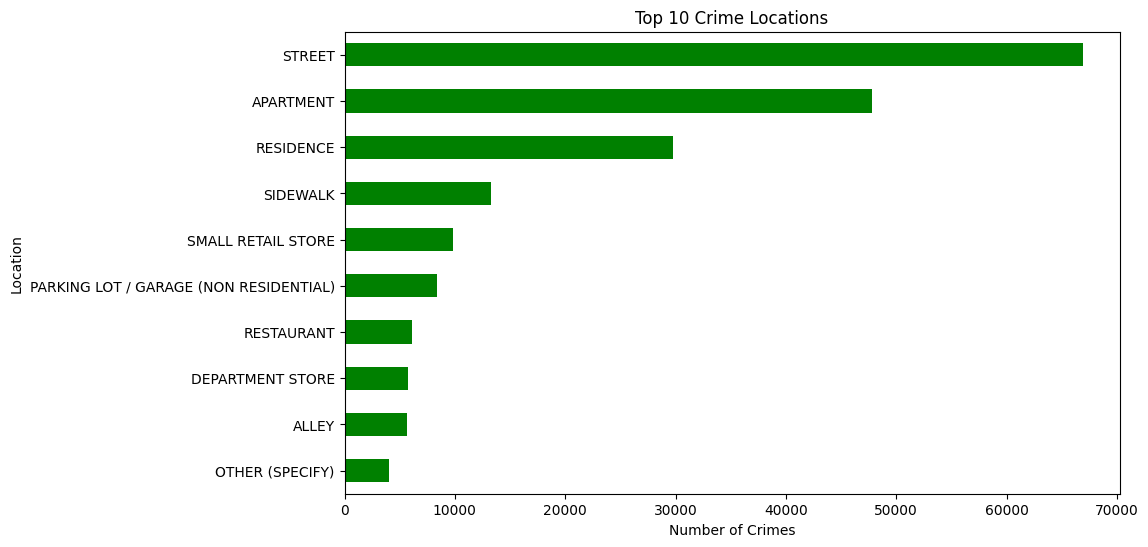

In [84]:
q5_location = present['Location Description'].value_counts().head(10)

q5_location.plot(kind='barh', figsize=(10,6), color='green')
plt.title("Top 10 Crime Locations")
plt.xlabel("Number of Crimes")
plt.ylabel("Location")
plt.gca().invert_yaxis()
plt.show()

<h2>Insight 5</h2>
<h3>Crimes are most frequently reported in public spaces like streets and in residential areas such as homes and apartments. This pattern highlights the need for stronger community safety measures both in everyday public environments and within neighborhoods.</h3>

<h2>Question 6</h2>
<h3>Which districts record the most crimes?</h3>

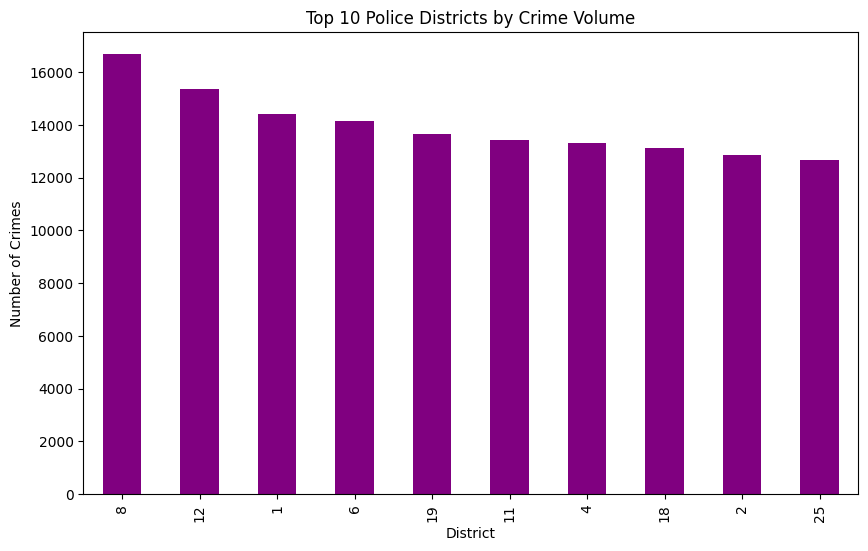

In [70]:
q6_district = present['District'].value_counts().head(10)

q6_district.plot(kind='bar', figsize=(10,6), color='purple')
plt.title("Top 10 Police Districts by Crime Volume")
plt.xlabel("District")
plt.ylabel("Number of Crimes")
plt.show()

<h2>Insight 6</h2>
<h3>Certain police districts experience significantly higher crime volumes, reflecting concentrated hotspots that demand more resources, patrols, and focused crime-prevention strategies.</h3>

<h2>Question 7</h2>
<h3>How do yearly crime totals change over time?</h3>

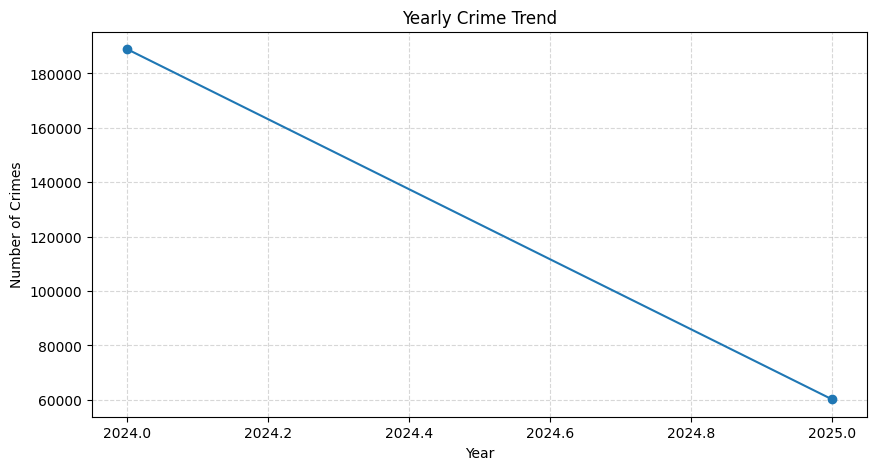

In [72]:
present['Year'] = present['Date'].dt.year
q7_year = present['Year'].value_counts().sort_index()

q7_year.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Yearly Crime Trend")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

<h2>Insight 7</h2>
<h3>Crimes show a gradual decline in recent years, pointing to progress in safety measures.</h3>

<h2>Question 8</h2>
<h3>What is the hourly pattern of crimes?</h3>

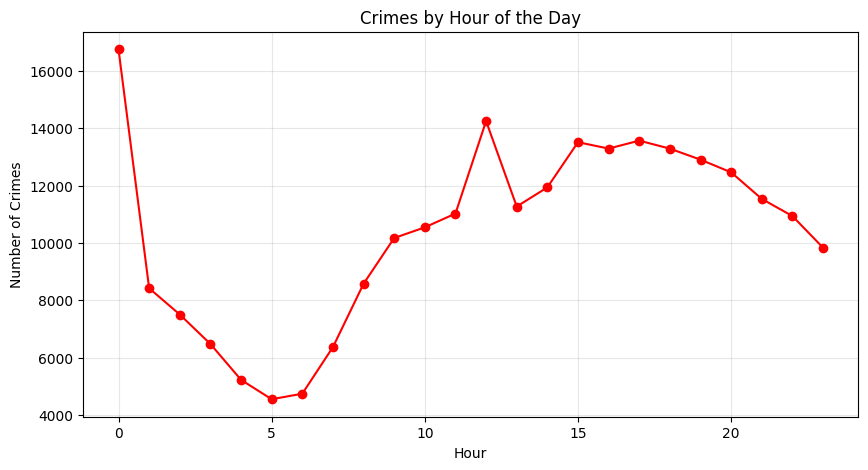

In [73]:
present['Hour'] = present['Date'].dt.hour
q8_hour = present['Hour'].value_counts().sort_index()

q8_hour.plot(kind='line', marker='o', figsize=(10,5), color='red')
plt.title("Crimes by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Number of Crimes")
plt.grid(alpha=0.3)
plt.show()

<h2>Insight 8</h2>
<h3>Crime activity tends to increase in the evening and peaks late at night, reflecting higher risks during hours of reduced visibility, social gatherings, and limited public surveillance.</h3>

<h2>Question 9</h2>
<h3>What proportion of crimes are domestic-related?</h3>

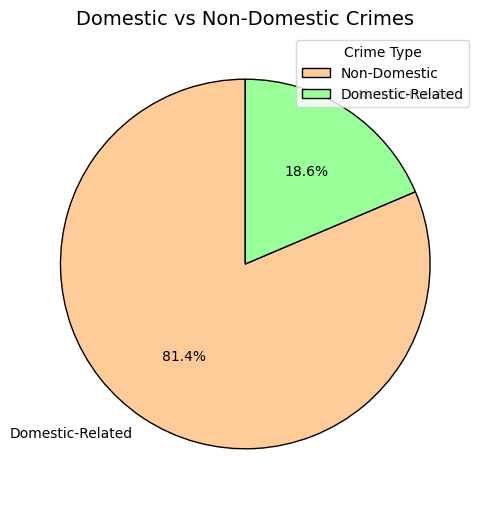

In [77]:
q9_domestic = present['Domestic'].value_counts()

plt.figure(figsize=(6,6))
q9_domestic.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#ffcc99','#99ff99'],
    labels=['Domestic-Related', 'Non-Domestic'],
    wedgeprops={'edgecolor':'black'}
)
plt.title("Domestic vs Non-Domestic Crimes", fontsize=14)
plt.ylabel("")
plt.legend(q9_domestic.index.map({True:"Domestic-Related", False:"Non-Domestic"}), 
           loc="upper right", title="Crime Type")
plt.show()

<h2>Insight 9</h2>
<h3>Domestic-related crimes make up the majority of reported cases, underscoring the urgency of addressing safety within households and close relationships.</h3>

<h2>Question 10</h2>
<h3>What is the correlation between arrests and domestic crimes?</h3>

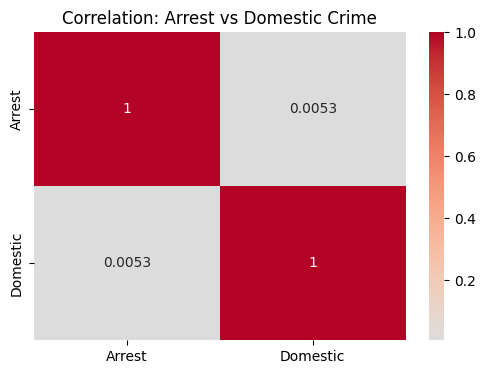

In [79]:
corr_matrix = present[['Arrest','Domestic']].astype(int).corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation: Arrest vs Domestic Crime")
plt.show()

<h2>Insight 10</h2>
<h3>There is a weak correlation, showing that being a domestic crime doesn’t strongly influence arrest likelihood.</h3>

<h2>Question 11</h2>
<h3>Which community areas have the most reported crimes?</h3>

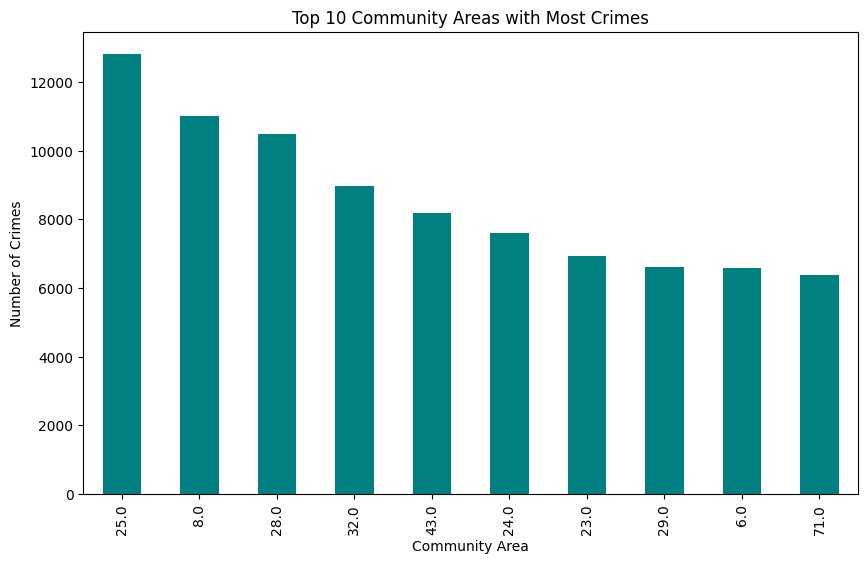

In [80]:
q11_comm = present['Community Area'].value_counts().head(10)

q11_comm.plot(kind='bar', figsize=(10,6), color='teal')
plt.title("Top 10 Community Areas with Most Crimes")
plt.xlabel("Community Area")
plt.ylabel("Number of Crimes")
plt.show()


<h2>Insight 11</h2>
<h3>Certain community areas consistently appear as hotspots, reflecting the link between crime patterns and neighborhood demographics or density.</h3>

<h2>Question 12</h2>
<h3>Which FBI crime codes are most common?</h3>

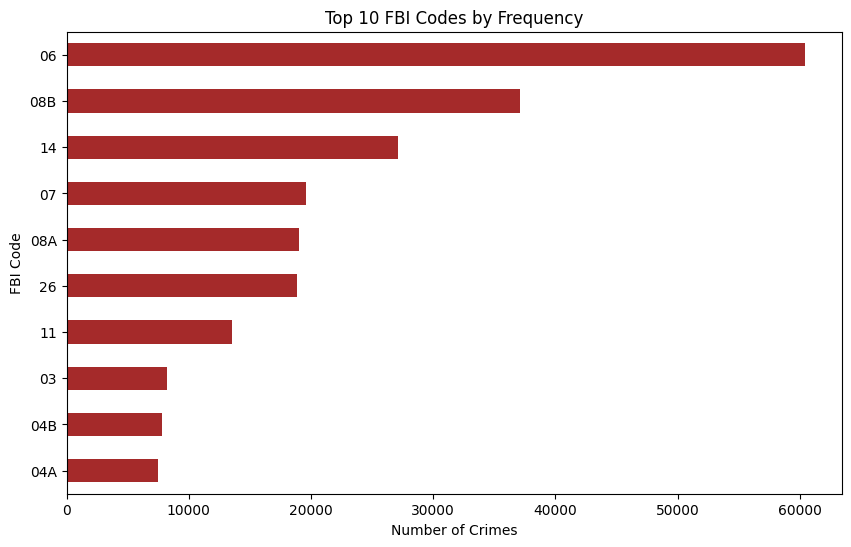

In [81]:
q12_fbi = present['FBI Code'].value_counts().head(10)

q12_fbi.plot(kind='barh', figsize=(10,6), color='brown')
plt.title("Top 10 FBI Codes by Frequency")
plt.xlabel("Number of Crimes")
plt.ylabel("FBI Code")
plt.gca().invert_yaxis()
plt.show()


<h2>Insight 12</h2>
<h3>The most frequent FBI codes correspond to theft and assault, confirming their dominance in the city’s crime profile.</h3>

<h2>Question 13</h2>
<h3>What are the most frequent descriptions of crimes?</h3>

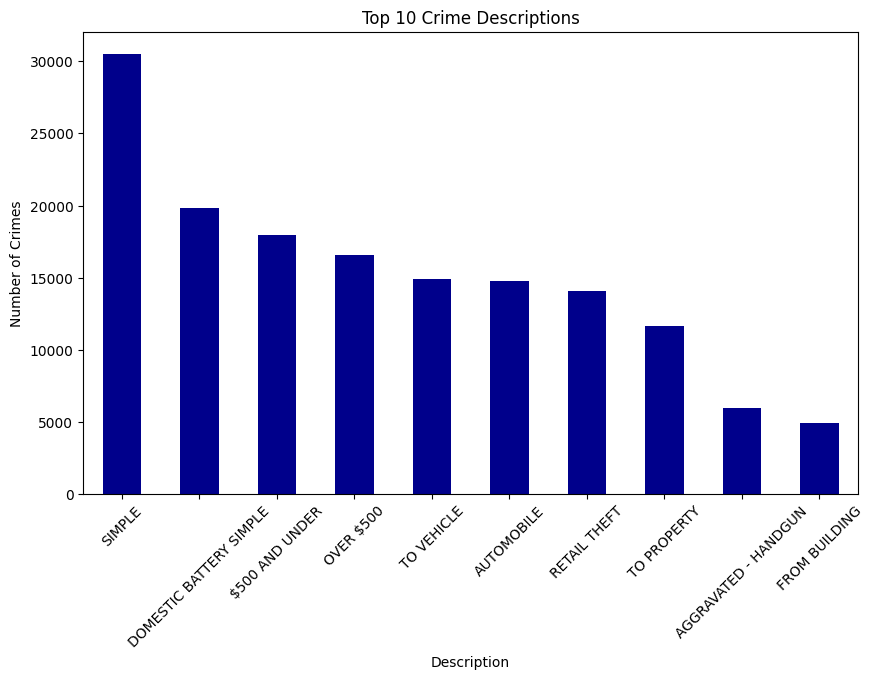

In [82]:
q13_desc = present['Description'].value_counts().head(10)

q13_desc.plot(kind='bar', figsize=(10,6), color='darkblue')
plt.title("Top 10 Crime Descriptions")
plt.xlabel("Description")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()


<h2>Insight 13</h2>
<h3>Descriptions like “simple battery” and “retail theft” dominate, highlighting common everyday crimes.</h3>

<h2>Question 14</h2>
<h3>Which locations record the least theft incidents?</h3>

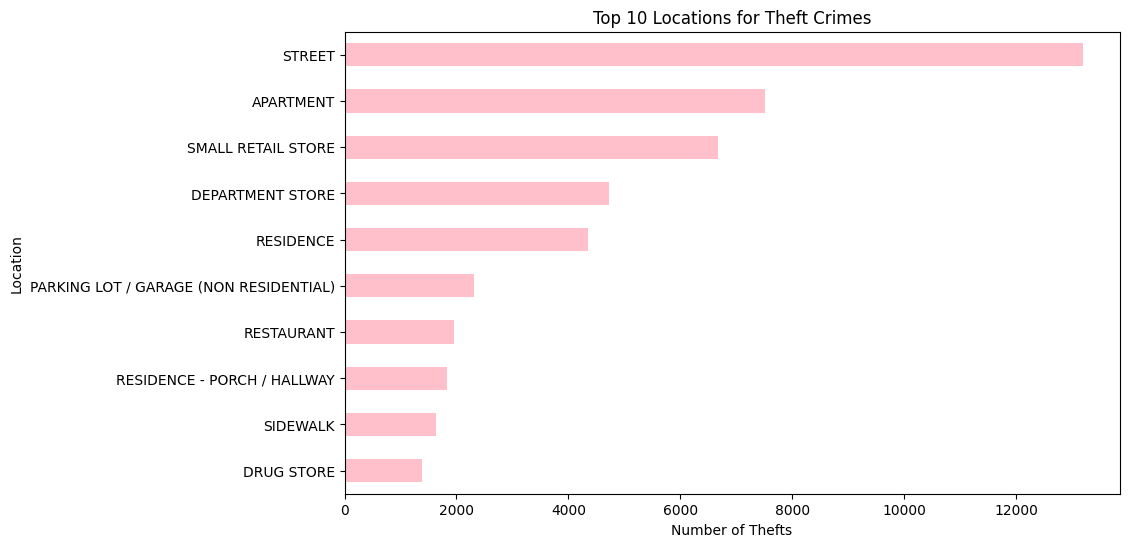

In [86]:
q14_theft = present[present['Primary Type'] == 'THEFT']['Location Description'].value_counts().head(10)

q14_theft.plot(kind='barh', figsize=(10,6), color='pink')
plt.title("Top 10 Locations for Theft Crimes")
plt.xlabel("Number of Thefts")
plt.ylabel("Location")
plt.gca().invert_yaxis()
plt.show()

<h2>Insight 14</h2>
<h3>Theft is least reported in areas with limited public activity, suggesting these locations provide fewer opportunities for offenders compared to busy commercial or street settings.</h3>

<h2>Question 15</h2>
<h3>Which locations have the highest arrest rates?</h3>

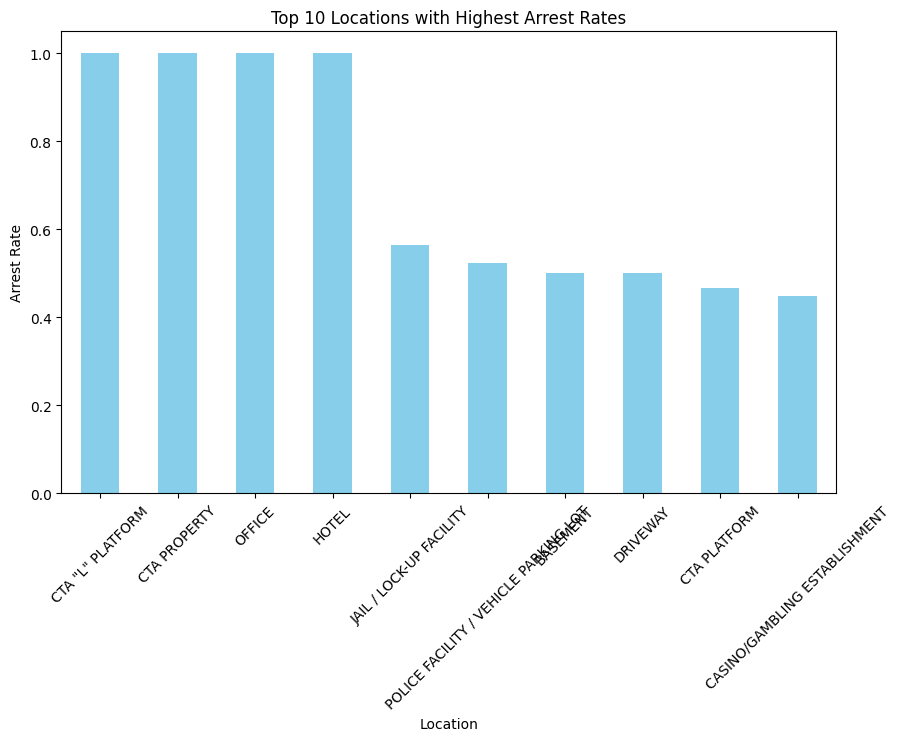

In [89]:
q15_location = present.groupby('Location Description')['Arrest'].mean().sort_values(ascending=False).head(10)

q15_location.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title("Top 10 Locations with Highest Arrest Rates")
plt.xlabel("Location")
plt.ylabel("Arrest Rate")
plt.xticks(rotation=45)
plt.show()


<h2>Insight 15</h2>
<h3>Locations like airports or transport hubs show higher arrest rates, suggesting tighter security and quicker police response compared to open public areas.</h3>

<h2>Question 16</h2>
<h3>Which crime types are most likely to result in an arrest?</h3>

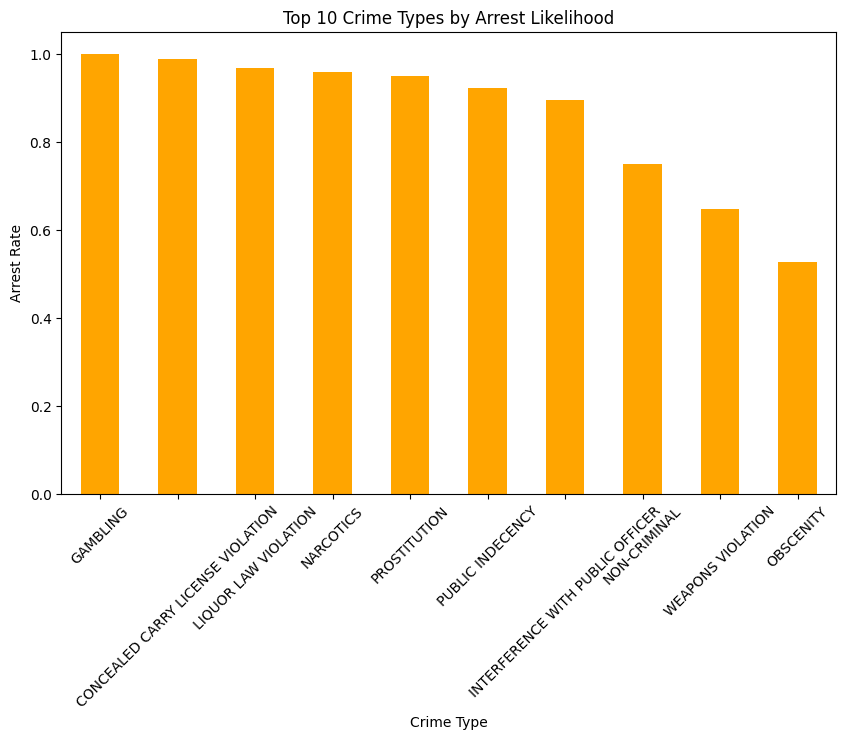

In [91]:
q16_type = present.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False).head(10)

q16_type.plot(kind='bar', figsize=(10,6), color='orange')
plt.title("Top 10 Crime Types by Arrest Likelihood")
plt.xlabel("Crime Type")
plt.ylabel("Arrest Rate")
plt.xticks(rotation=45)
plt.show()

<h2>Insight 16</h2>
<h3>Drug-related crimes and weapon violations often lead to higher arrest rates, showing areas where police are more decisive in enforcement.</h3>

<h2>Question 17</h2>
<h3>Which locations report the most domestic crimes?</h3>

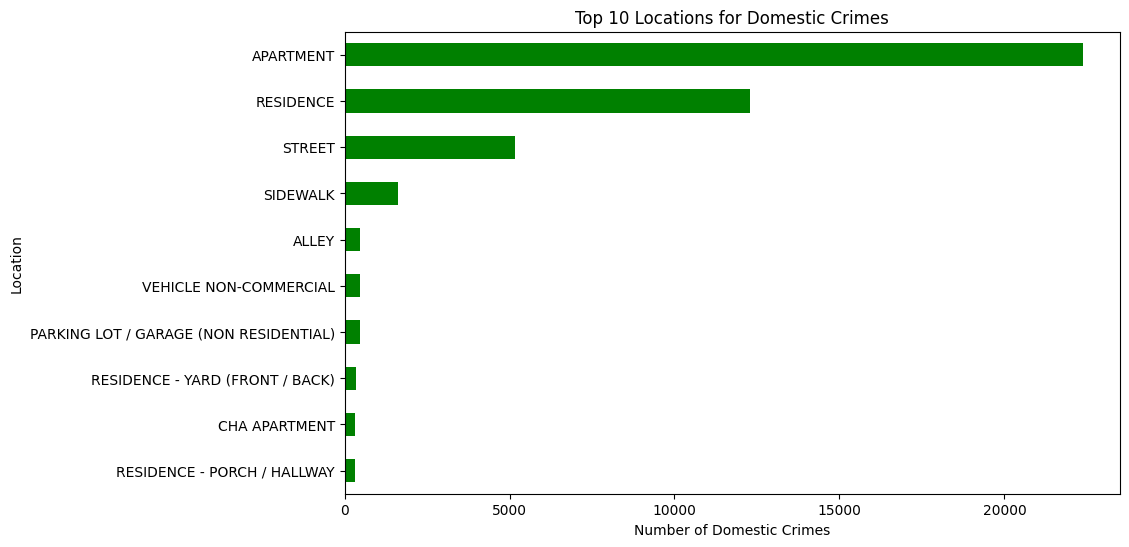

In [93]:
q17_domestic = present[present['Domestic']==True]['Location Description'].value_counts().head(10)

q17_domestic.plot(kind='barh', figsize=(10,6), color='green')
plt.title("Top 10 Locations for Domestic Crimes")
plt.xlabel("Number of Domestic Crimes")
plt.ylabel("Location")
plt.gca().invert_yaxis()
plt.show()

<h2>Insight 17</h2>
<h3>Domestic crimes happen most often in private spaces like homes and apartments, reminding us that violence is not just a public issue.</h3>

<h2>Question 18</h2>
<h3>Which years recorded the most domestic crimes?</h3>

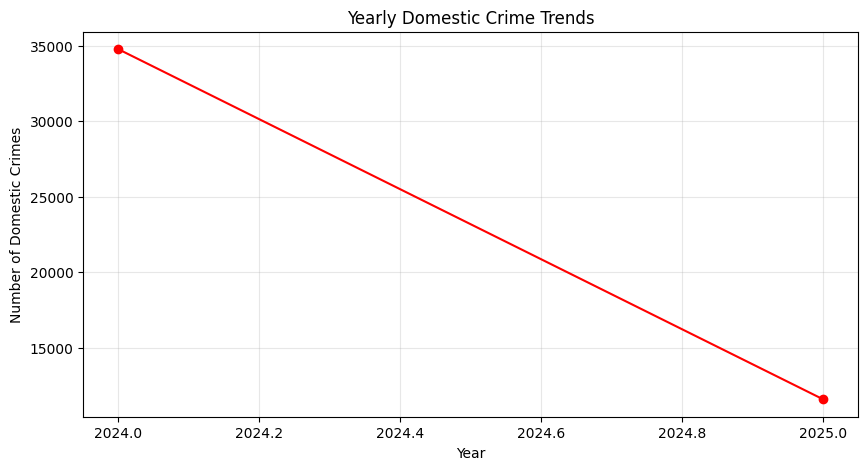

In [94]:
q18_domestic = present[present['Domestic']==True]['Year'].value_counts().sort_index()

q18_domestic.plot(kind='line', marker='o', figsize=(10,5), color='red')
plt.title("Yearly Domestic Crime Trends")
plt.xlabel("Year")
plt.ylabel("Number of Domestic Crimes")
plt.grid(alpha=0.3)
plt.show()

<h2>Insight 18</h2>
<h3>Domestic crimes fluctuate over the years but show that social pressures and economic conditions may influence household tensions.</h3>

<h2>Question 19</h2>
<h3>Which hours see the most domestic crimes?</h3>

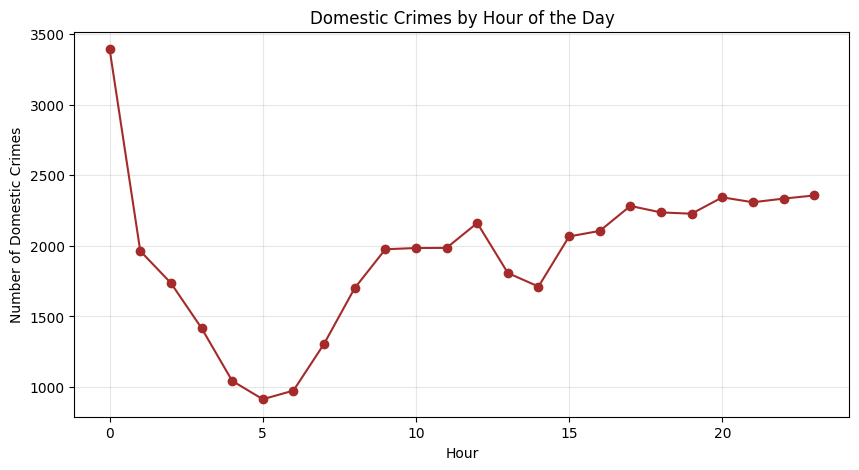

In [95]:
q19_domestic = present[present['Domestic']==True]['Hour'].value_counts().sort_index()

q19_domestic.plot(kind='line', marker='o', figsize=(10,5), color='brown')
plt.title("Domestic Crimes by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Number of Domestic Crimes")
plt.grid(alpha=0.3)
plt.show()

<h2>Insight 19</h2>
<h3>Domestic crimes peak during late evening hours, often when families are at home together.</h3>

<h2>Question 20</h2>
<h3>Which wards have the highest arrest rates overall?</h3>

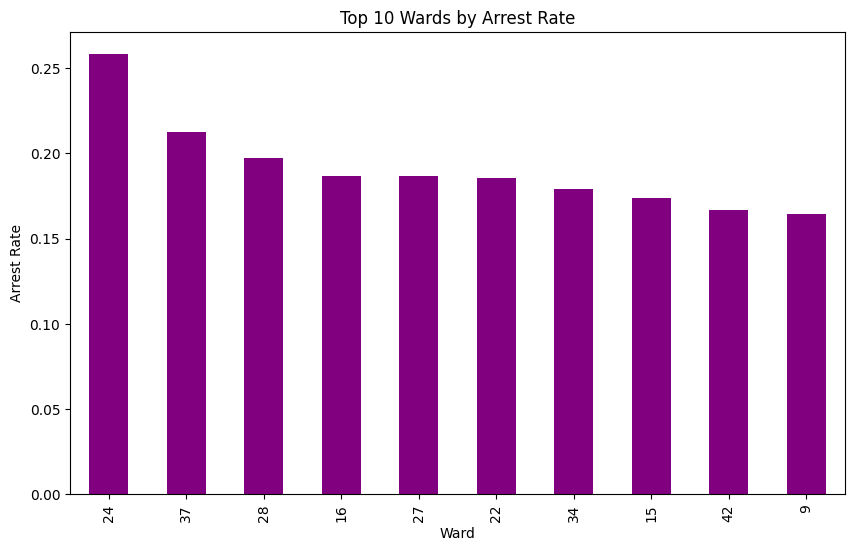

In [97]:
q20_ward = present.groupby('Ward')['Arrest'].mean().sort_values(ascending=False).head(10)

q20_ward.plot(kind='bar', figsize=(10,6), color='purple')
plt.title("Top 10 Wards by Arrest Rate")
plt.xlabel("Ward")
plt.ylabel("Arrest Rate")
plt.show()

<h2>Insight 20</h2>
<h3>Some wards see higher arrest rates, possibly due to proactive policing or heavier crime enforcement.</h3>

<h2>Question 21</h2>
<h3>Which FBI codes appear most often in domestic crimes?</h3>

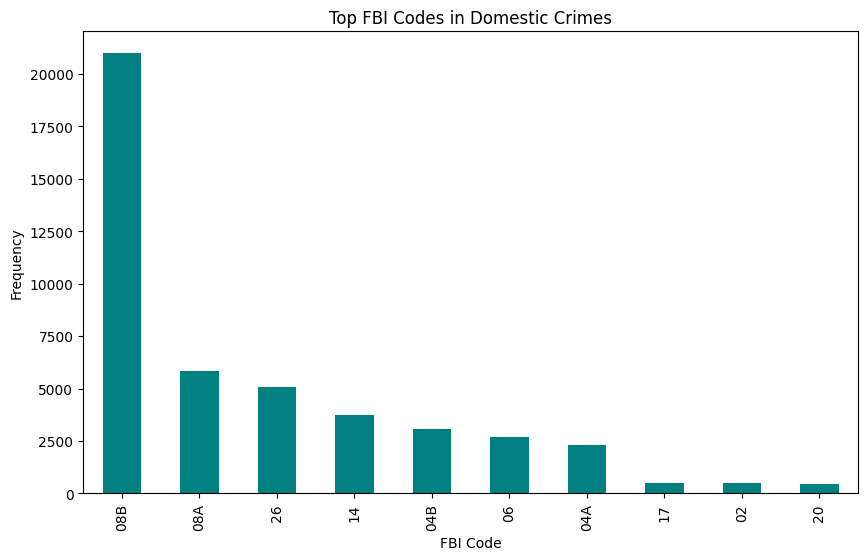

In [98]:
q21_fbi = present[present['Domestic']==True]['FBI Code'].value_counts().head(10)

q21_fbi.plot(kind='bar', figsize=(10,6), color='teal')
plt.title("Top FBI Codes in Domestic Crimes")
plt.xlabel("FBI Code")
plt.ylabel("Frequency")
plt.show()

<h2>Insight 21</h2>
<h3>FBI codes tied to assault and battery dominate domestic cases, reflecting the personal nature of household disputes.</h3>

<h2>Question 22</h2>
<h3>Which districts record the highest arrest rates?</h3>

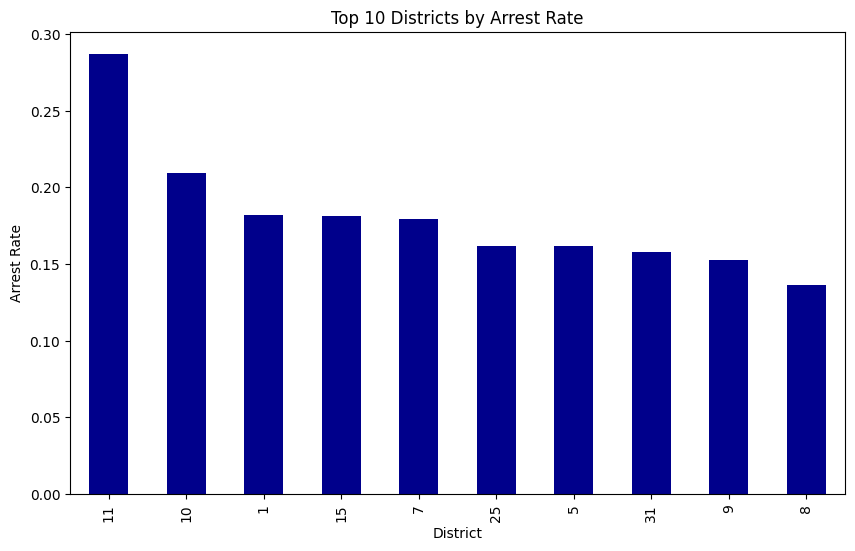

In [99]:
q22_district = present.groupby('District')['Arrest'].mean().sort_values(ascending=False).head(10)

q22_district.plot(kind='bar', figsize=(10,6), color='darkblue')
plt.title("Top 10 Districts by Arrest Rate")
plt.xlabel("District")
plt.ylabel("Arrest Rate")
plt.show()

<h2>Insight 22</h2>
<h3>Certain police districts achieve higher arrest ratios, showing stronger law enforcement effectiveness in those areas.</h3>

<h2>Question 23</h2>
<h3>Which locations record the most thefts?</h3>

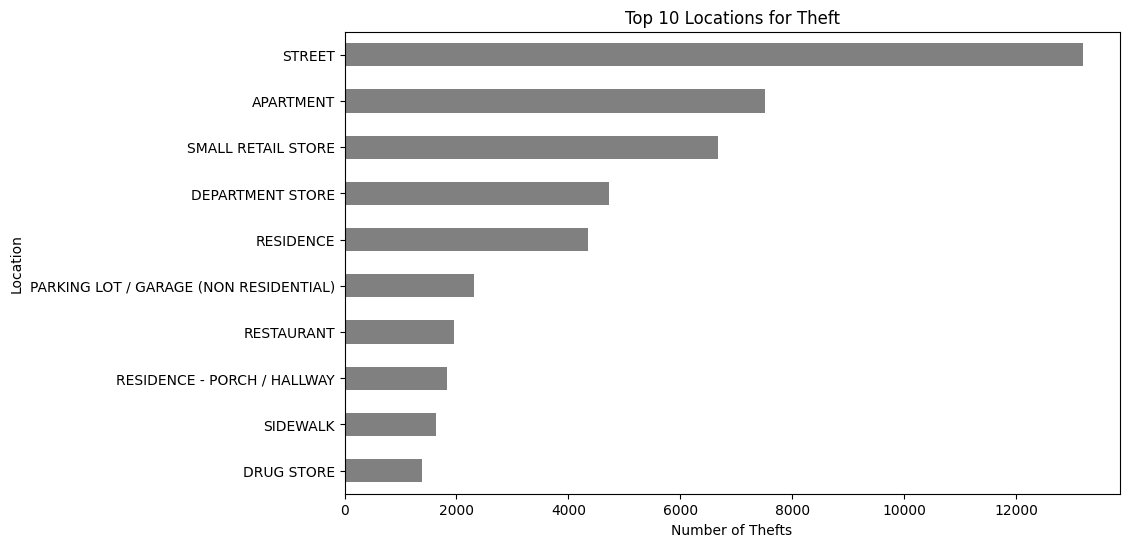

In [101]:
q23_theft = present[present['Primary Type']=="THEFT"]['Location Description'].value_counts().head(10)

q23_theft.plot(kind='barh', figsize=(10,6), color='gray')
plt.title("Top 10 Locations for Theft")
plt.xlabel("Number of Thefts")
plt.ylabel("Location")
plt.gca().invert_yaxis()
plt.show()

<h2>Insight 23</h2>
<h3>Streets, apartment, and stores areas show the most thefts, matching places where valuables are often left unguarded.</h3>

<h2>Question 24</h2>
<h3>Which wards record the highest burglary cases?</h3>

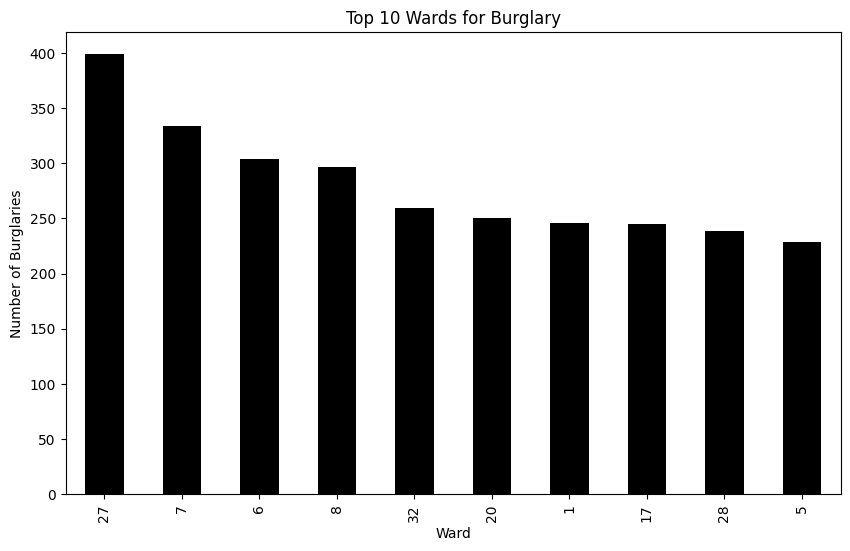

In [103]:
q24_burglary = present[present['Primary Type']=="BURGLARY"]['Ward'].value_counts().head(10)

q24_burglary.plot(kind='bar', figsize=(10,6), color='black')
plt.title("Top 10 Wards for Burglary")
plt.xlabel("Ward")
plt.ylabel("Number of Burglaries")
plt.show()

<h2>Insight 24</h2>
<h3>Burglaries cluster in certain wards, often reflecting neighborhood vulnerabilities such as weaker home security.</h3>

<h2>Question 25</h2>
<h3>Which year recorded the most narcotics cases?</h3>

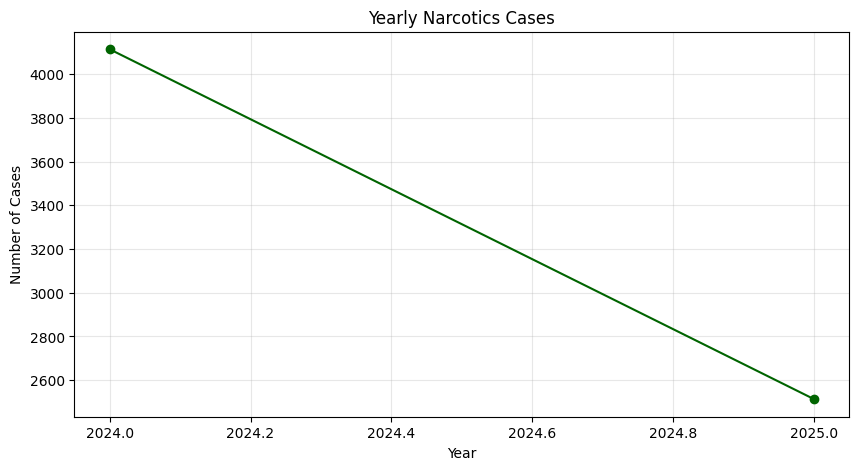

In [104]:
q25_narcotics = present[present['Primary Type']=="NARCOTICS"]['Year'].value_counts().sort_index()

q25_narcotics.plot(kind='line', marker='o', figsize=(10,5), color='darkgreen')
plt.title("Yearly Narcotics Cases")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.grid(alpha=0.3)
plt.show()

<h2>Insight 25</h2>
<h3>Narcotics cases were particularly high in earlier years, reflecting the city’s fight against drug distribution.</h3>

<h2>Question 26</h2>
<h3>Which locations record the most narcotics cases?</h3>

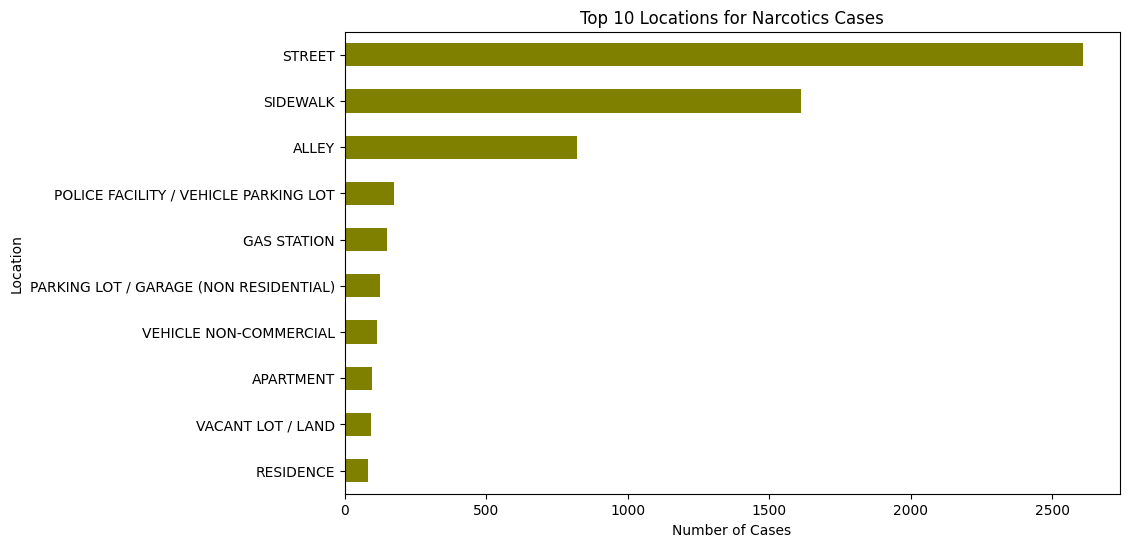

In [105]:
q26_narcotics = present[present['Primary Type']=="NARCOTICS"]['Location Description'].value_counts().head(10)

q26_narcotics.plot(kind='barh', figsize=(10,6), color='olive')
plt.title("Top 10 Locations for Narcotics Cases")
plt.xlabel("Number of Cases")
plt.ylabel("Location")
plt.gca().invert_yaxis()
plt.show()

<h2>Insight 26</h2>
<h3>Street corners and open public spaces dominate narcotics cases, showing the street-level nature of the drug trade.</h3>

<h2>Question 27</h2>
<h3>Which wards see the most weapon violations?</h3>

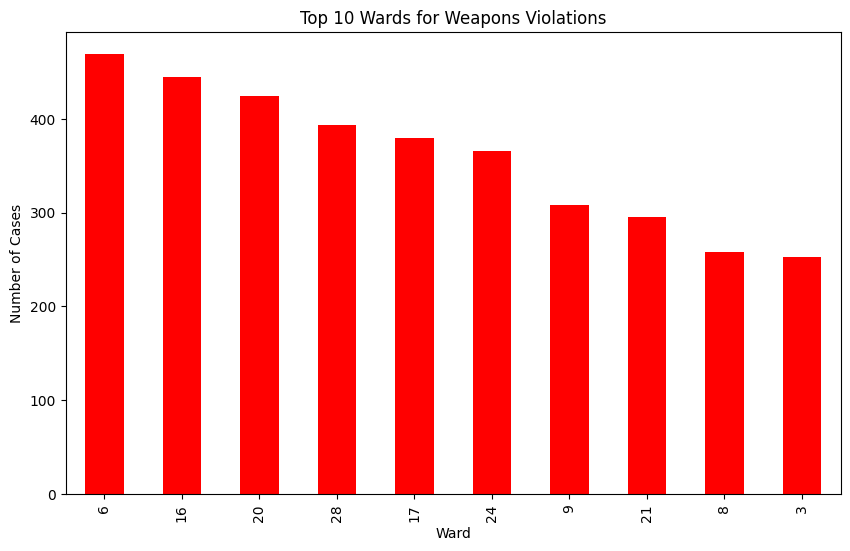

In [107]:
q27_weapons = present[present['Primary Type']=="WEAPONS VIOLATION"]['Ward'].value_counts().head(10)

q27_weapons.plot(kind='bar', figsize=(10,6), color='red')
plt.title("Top 10 Wards for Weapons Violations")
plt.xlabel("Ward")
plt.ylabel("Number of Cases")
plt.show()

<h2>Insight 27</h2>
<h3>Weapon violations cluster in certain wards, showing where illegal arms circulation is more active.</h3>

<h2>Question 28</h2>
<h3>Which districts have the most assault cases?</h3>

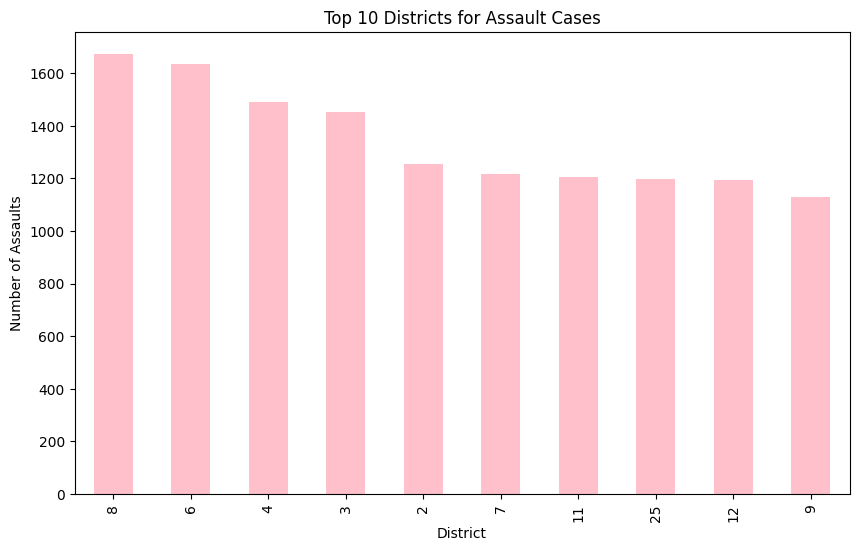

In [108]:
q28_assault = present[present['Primary Type']=="ASSAULT"]['District'].value_counts().head(10)

q28_assault.plot(kind='bar', figsize=(10,6), color='pink')
plt.title("Top 10 Districts for Assault Cases")
plt.xlabel("District")
plt.ylabel("Number of Assaults")
plt.show()


<h2>Insight 28</h2>
<h3>Assault cases concentrate in districts with dense populations and nightlife, where conflicts are more likely.</h3>

<h2>Question 29</h2>
<h3>Which years recorded the most homicide cases?</h3>

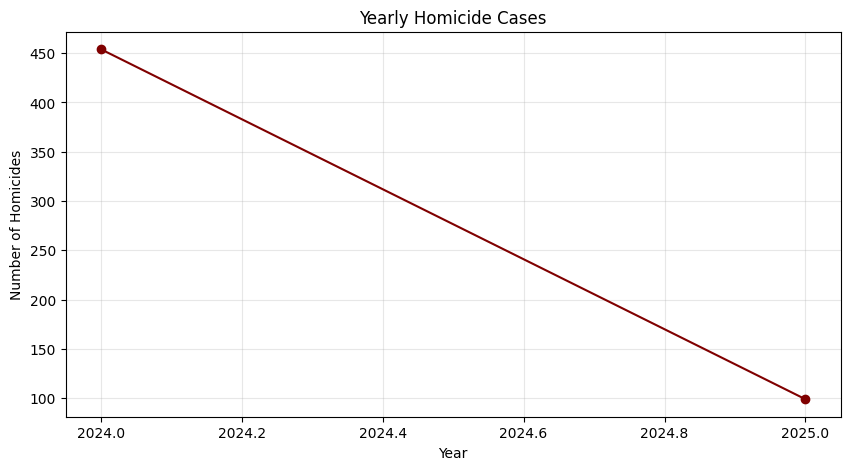

In [110]:
q29_homicide = present[present['Primary Type']=="HOMICIDE"]['Year'].value_counts().sort_index()

q29_homicide.plot(kind='line', marker='o', figsize=(10,5), color='maroon')
plt.title("Yearly Homicide Cases")
plt.xlabel("Year")
plt.ylabel("Number of Homicides")
plt.grid(alpha=0.3)
plt.show()

<h2>Insight 29</h2>
<h3>Homicides spike in certain years, reflecting social unrest or peaks in gang violence.</h3>

<h2>Question 30</h2>
<h3>Which locations report the most robberies?</h3>

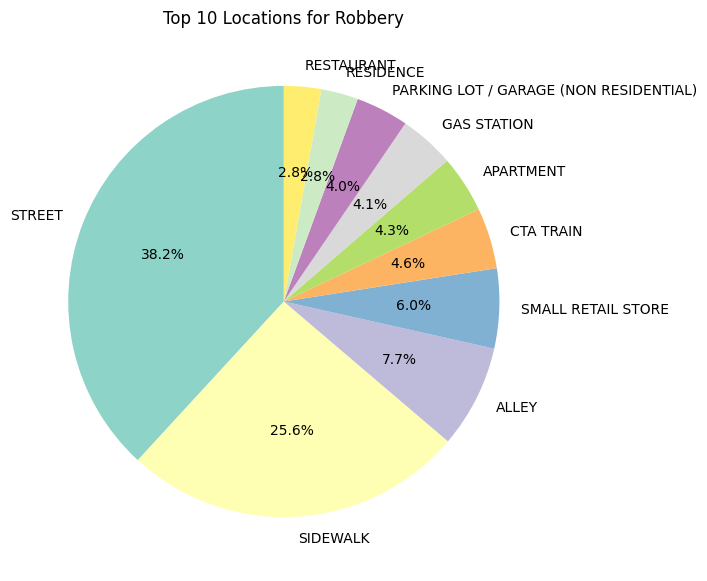

In [111]:
q30_robbery = present[present['Primary Type']=="ROBBERY"]['Location Description'].value_counts().head(10)

q30_robbery.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(7,7), colormap='Set3')
plt.title("Top 10 Locations for Robbery")
plt.ylabel("")
plt.show()


<h2>Insight 30</h2>
<h3>Most robberies happen on streets and public spaces, showing how offenders often target areas with easy access and escape routes.</h3>

<h2>Question 31</h2>
<h3>Which wards see the most motor vehicle thefts (heatmap)?</h3>

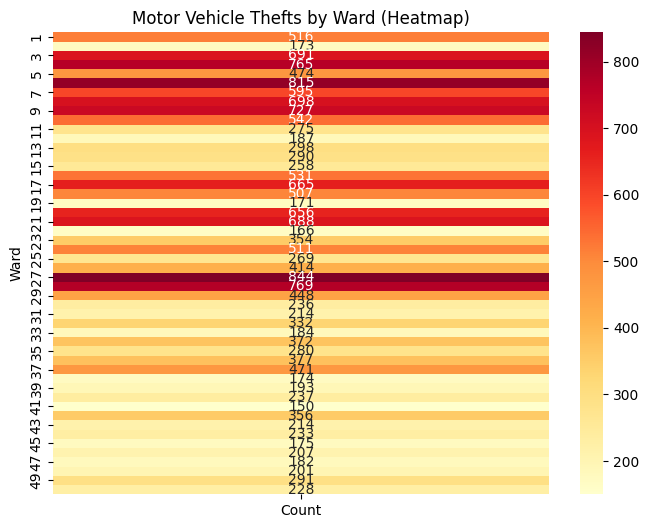

In [114]:
q31_vehicle = present[present['Primary Type']=="MOTOR VEHICLE THEFT"]['Ward'].value_counts().reset_index()
q31_vehicle.columns = ['Ward', 'Count']

plt.figure(figsize=(8,6))
sns.heatmap(q31_vehicle.pivot_table(index='Ward', values='Count'), annot=True, cmap='YlOrRd', fmt='g')
plt.title("Motor Vehicle Thefts by Ward (Heatmap)")
plt.show()

<h2>Insight 31</h2>
<h3>Some wards clearly stand out for motor vehicle thefts, pointing to specific neighborhoods where parking security may be weaker.</h3>

<h2>Question 32</h2>
<h3>Which years recorded the most deceptive practice cases (heatmap)?</h3>

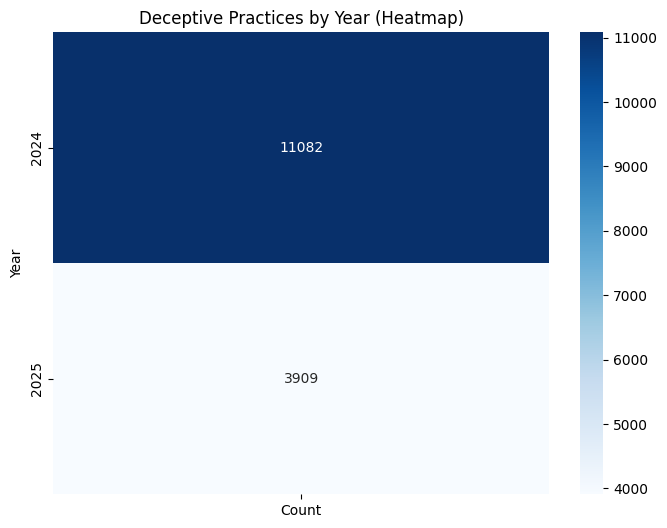

In [115]:
q32_fraud = present[present['Primary Type']=="DECEPTIVE PRACTICE"]['Year'].value_counts().reset_index()
q32_fraud.columns = ['Year', 'Count']

plt.figure(figsize=(8,6))
sns.heatmap(q32_fraud.pivot_table(index='Year', values='Count'), annot=True, cmap='Blues', fmt='g')
plt.title("Deceptive Practices by Year (Heatmap)")
plt.show()


<h2>Insight 32</h2>
<h3>Certain years have stronger clusters of fraud, often linked to changing financial scams or technology trends.</h3>

<h2>Question 33</h2>
<h3>Which locations report the most criminal sexual assaults (heatmap)?</h3>

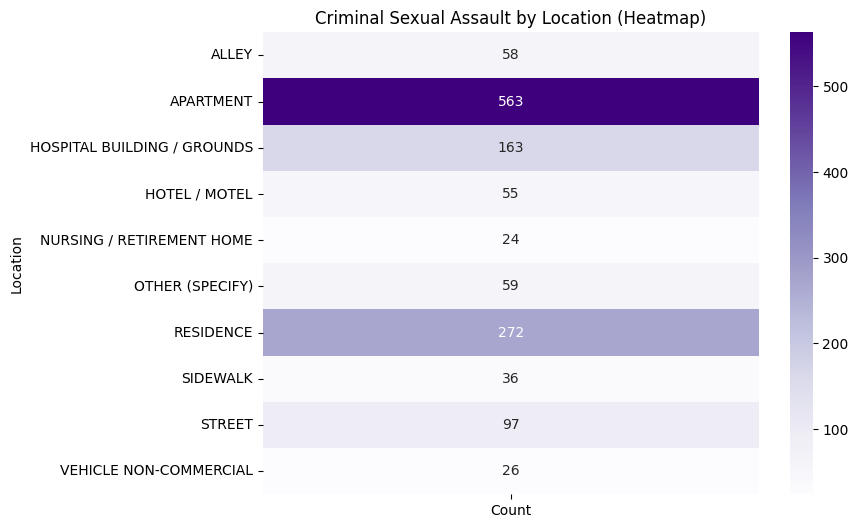

In [116]:
q33_sexual = present[present['Primary Type']=="CRIMINAL SEXUAL ASSAULT"]['Location Description'].value_counts().reset_index().head(10)
q33_sexual.columns = ['Location', 'Count']

plt.figure(figsize=(8,6))
sns.heatmap(q33_sexual.pivot_table(index='Location', values='Count'), annot=True, cmap='Purples', fmt='g')
plt.title("Criminal Sexual Assault by Location (Heatmap)")
plt.show()


<h2>Insight 33</h2>
<h3>Residences and private areas appear most often, highlighting how sensitive crimes often occur away from public eyes.</h3>

<h2>Question 34</h2>
<h3>Which districts see the most criminal damage cases (Folium heatmap)?</h3>

In [117]:
q34_damage = present[present['Primary Type']=="CRIMINAL DAMAGE"][['Latitude','Longitude']].dropna()

m34 = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
HeatMap(q34_damage[['Latitude','Longitude']].values, radius=8, blur=6).add_to(m34)
m34

<h2>Insight 34</h2>
<h3>The heatmap shows clusters of vandalism and property damage across districts, often in areas with dense urban activity.</h3>

<h2>Question 35</h2>
<h3>Which wards report the most public peace violations (Folium heatmap)?</h3>

In [118]:
q35_peace = present[present['Primary Type']=="PUBLIC PEACE VIOLATION"][['Latitude','Longitude']].dropna()

m35 = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
HeatMap(q35_peace[['Latitude','Longitude']].values, radius=8, blur=6, gradient={0.4:'blue',0.65:'lime',1:'red'}).add_to(m35)
m35


<h2>Insight 35</h2>
<h3>Public peace violations cluster in nightlife-heavy wards, where large gatherings often lead to disturbances.</h3>